# Data Analysis Nanodegree
## Project: Titanic Survival Exploration

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict the survival of a passanger. A further investigation will be presented on the social constructs and their relation to the probability of survival.

**Project Questions:** *1) Which features best predict the survival of a passanger? 2) What are some inferred social constructs and their relation to the probability of survival?*

# Getting Started
To begin working with the RMS Titanic passenger data, we'll first need to `import` the functionality we need, and load our data into a `pandas` DataFrame.
## Acquire Data

In [1]:
# Data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

## Analyze by Describing Data
### Which features are available in the dataset?



In [2]:
# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

### Which features are categorial?
These values classify the samples into sets of similar samples.
- **Categorial**: Survived, Sex, Embarked, and Pclass.

### Which features are numerical?
These values can be discrete, continuous, or time-series.
- **Numerical**: Age, Fare, SibSp, Parch.

### Which features are mixed data types?
Numerical, alphanumeric data within same feature.
- Ticket and cabin are alphanumeric

### Which features may contain errors of typos?
This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.
- Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [3]:
# Print the last few entries of the RMS Titanic data
display(full_data.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Which features contain blank, null or empty values?
These will require correcting.
- Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.

### What are the data types for various features?
Helps during conversion.
- Seven features are integer or floats
- Five features are strings (object).

In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB



### What is the distribution of numerical feature values across the samples?
This helps us determine how representative is the dataset of the actual problem domain.
- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

In [5]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### What is the distribution of categorical features?
- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [6]:
full_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


## Assumptions Based on Data Analysis

### Correlating
We want to know how well does each feature correlate with Survival.

### Completing
- We may want to complete Age feature as it is definitely correlated to survival.

### Correcting
- Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
- Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
- PassengerId may be dropped from training dataset as it does not contribute to survival.
- Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

### Creating
1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a Fare range feature if it helps our analysis.

### Classifying
Further assumptions.
1. Women (Sex=female) were more likely to have survived.
2. Children (Age<?) were more likely to have survived.
3. The upper-class passengers (Pclass=1) were more likely to have survived.

# Feature Analysis

## Analyze by Pivoting Features
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

- **Pclass**: We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
- **Sex**: We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
- **SibSp and Parch**: These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [7]:
full_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
full_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
full_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
full_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyze by Vizualising Data
Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [11]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcomes[i]`.

To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of survival. Since we are interested in how *accurate* our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct. Run the code cell below to create our `accuracy_score` function and test a prediction on all passengers.  

**Think:** *If we predict that all passangers survived, what would you expect the accuracy of our predictions to be?*

In [12]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(len(outcomes), dtype = int))
print accuracy_score(outcomes[:], predictions)

Predictions have an accuracy of 38.38%.


### Correlating numerical features
**Observations.**
- Infants (Age <=4) had high survival rate.
- Large number of 20-40 year olds did not survive.
- Most passengers are in 20-40 age range.

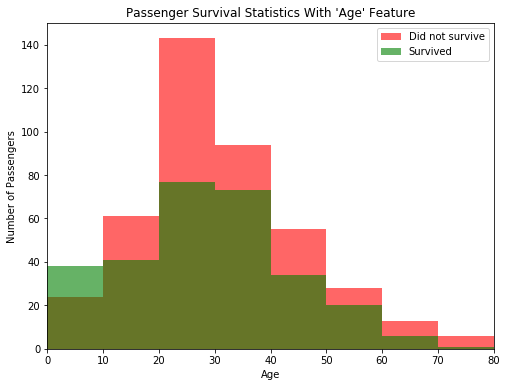

In [18]:
vs.survival_stats(data, outcomes, 'Age')

### Correlating categorical features
**Observations.**
- Female passengers had much better survival rate than males.

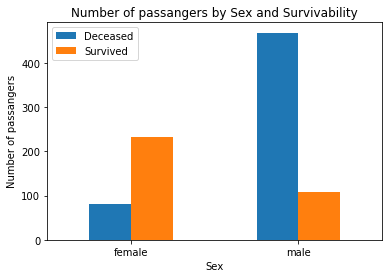

In [14]:
# vs.survival_stats(data, outcomes, 'Sex')

table = pd.crosstab(data['Sex'], outcomes)

# plot
ax = table.plot.bar()
ax.set(title = 'Number of passangers by Sex and Survivability', ylabel = 'Number of passangers')

# fix rotation of x-ticks
ax.set_xticklabels(ax.get_xmajorticklabels(), rotation = 0)
# Setup legend
ax.legend(labels = ['Deceased', 'Survived'])

**Observations.**
- Pclass=3 had most passengers, however most did not survive.
- Infant passengers in Pclass=2 and Pclass=3 mostly survived.
- Most passengers in Pclass=1 survived.
- Pclass varies in terms of Age distribution of passengers.

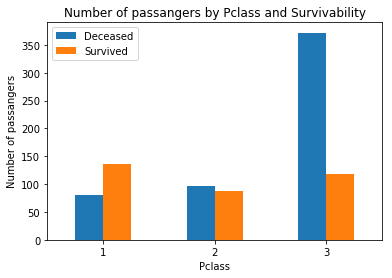

In [16]:
#vs.survival_stats(data, outcomes, 'Pclass')

table = pd.crosstab(data['Pclass'], outcomes)

# plot
ax = table.plot.bar()
ax.set(title = 'Number of passangers by Pclass and Survivability', ylabel = 'Number of passangers')

# fix rotation of x-ticks
ax.set_xticklabels(ax.get_xmajorticklabels(), rotation = 0)
# Setup legend
ax.legend(labels = ['Deceased', 'Survived'])

**Observations.**
- Higher fare paying passengers had better survival.
- Port of embarkation correlates with survival rates.

In [20]:
full_data.query('Fare > 300')[['Ticket', 'Embarked', 'Survived', 'Fare']]

,Ticket,Embarked,Survived,Fare
258,PC 17755,C,1,512.3292
679,PC 17755,C,1,512.3292
737,PC 17755,C,1,512.3292


# Making Predictions

If we were asked to make a prediction about any passenger aboard the RMS Titanic whom we knew nothing about, then the best prediction we could make would be that they did not survive. This is because we can assume that a majority of the passengers (more than 50%) did not survive the ship sinking.

In [ ]:
def predictions_3(data):
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex'] == 'female' and passenger['Pclass'] == 1 and passenger['Age'] < 14:
            predictions.append(0)
        elif (passenger['Sex'] == 'male' and passenger['Age'] < 10 and passenger['Pclass'] == 2):
            predictions.append(1)
        elif (passenger['Sex'] == 'male' and passenger['Age'] < 10 and passenger['Pclass'] == 1):
            predictions.append(1)
        elif passenger['Sex'] == 'female' and (passenger['Pclass'] == 1 or passenger['Pclass'] == 2):
            predictions.append(1)
        elif (passenger['Sex'] == 'female' and passenger['Pclass'] == 3 and passenger['Parch'] == 1 and
              passenger['SibSp'] == 2):
            predictions.append(1)
        elif (passenger['Sex'] == 'female' and passenger['Pclass'] == 3 and passenger['Parch'] == 0 and
              passenger['Age'] < 10):
            predictions.append(1)
        elif (passenger['Sex'] == 'female' and passenger['Pclass'] == 3 and passenger['Age'] < 2):
            predictions.append(1)
        elif (passenger['Sex'] == 'female' and passenger['Pclass'] == 3 and passenger['Parch'] == 0
              and passenger['Age'] < 20):
            predictions.append(1)  # estimation
        elif (passenger['Sex'] == 'female' and passenger['Pclass'] == 3 and passenger['SibSp'] == 0
              and passenger['Age'] < 30):
            predictions.append(1)
        elif (passenger['Sex'] == 'female' and passenger['Pclass'] == 3 and passenger['SibSp'] == 3
              and passenger['Age'] < 40 and passenger['Age'] > 10 and passenger['Parch'] == 0):
            predictions.append(1)  
        else:
            predictions.append(0)
    
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

After considering the assumptions, and plotting different variable correlations, the prediction score achieved an accuracy of 81.93%

In [ ]:
print accuracy_score(outcomes, predictions)

# Conclusion

Numerical descriptions of the dataset served as a key factor in understanding the features of the dataset. Data visualization aided in isolating correlating variables and ultimately producing a better predictor.

The first main feature was sex, with females having a 74% chance of survival. The second main feature was age, where the majority of passengers of the biggest sample (age 20-40) did not survive. The third main feature was passenger class, where most of first class passengers survived, and the majority of second and third class passengers did not survive. 

These features fall under the assumed social constructs: females, infants, and first class passengers are more likely to survive.

# References
[Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

[Udacity's Machine Learning Nanodegree project on Titanic Survival Data](https://github.com/udacity/machine-learning/tree/master/projects/titanic_survival_exploration)